In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rnd
import cv2 as cv
from skimage.transform import resize
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import Javascript
#from google.colab import drive
#drive.mount('/content/drive')

#generando imagenes binarias

In [3]:
def potunary(ui,ob):
  if ui!=ob:
    return 1
  else:
    return 0

def potpair(ui,uj,t):
  return min(abs(ui-uj),t)

def energy(L,L0,t):
  E=[]
  alt=np.shape(L)[0]
  anc=np.shape(L)[1]
  for i in range(alt):
    for j in range(anc):
      if i==alt-1:
        if j==anc-1:
          u=potunary(L[i,j],L0[i,j])
          E.append(u)
          continue
        else:
          u=potunary(L[i,j],L0[i,j])
          f=potpair(L[i,j],L[i,j+1],t)
          E.append(u+f)
      else:
        if j==anc-1:
          u=potunary(L[i,j],L0[i,j])
          a=potpair(L[i,j],L[i+1,j],t)
          E.append(u+a)
        else:
          u=potunary(L[i,j],L0[i,j])
          f=potpair(L[i,j],L[i,j+1],t)
          a=potpair(L[i,j],L[i+1,j],t)
          d=potpair(L[i,j],L[i+1,j+1],t)
          E.append(u+(a+d+f))
  return np.sum(E)


Imagen de prueba

array([0., 1.], dtype=float32)

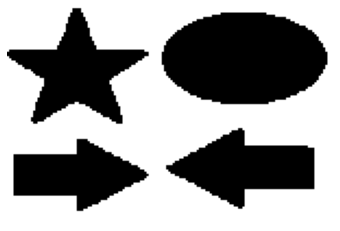

In [5]:
alto=100
ancho=150
im0= plt.imread('https://github.com/JuanDavid1703/Markov-Proyect/raw/main/Image/Prueba.png')
im0= resize(im0, (alto, ancho))[:,:,0]
for i in range(alto):
  for j in range(ancho):
    if im0[i,j]<0.5:
      im0[i,j]=0
    else:
      im0[i,j]=1
plt.imshow(im0,cmap="gray")
plt.axis("off")
np.unique(im0)

###Recontrucción usando algoritmo de escalado

In [60]:
i0=np.random.choice([0.0,1.0],size=(alto,ancho))
ipos=np.array(i0)
T0=6
anc=np.shape(i0)[1]
alt=np.shape(i0)[0]

t=0.8

errorin=np.sum(np.abs(im0-i0))
Ep=[]
Er=[]
Er.append(errorin)
error=errorin
x=[]
w=np.zeros((alt,anc))
v=np.zeros((alt,anc))
i=0
print(errorin)

7445.0


In [ ]:
while error>500 and i<20000:
  pos=[int(rnd.choice(range(alt))),int(rnd.choice(range(anc)))]

#energía antes del cambio  
  Eant=energy(ipos,im0,t)
  
  v=np.array(ipos)
  pot=np.sqrt(i)
#nxn
  if error>errorin/4:
    print("h")
    theta=5
    T=T0*(0.955)**pot
  elif error>errorin/5:
    print("o")
    theta=4
    T=T0*(0.96)**pot
  elif error>errorin/6:
    print("l")
    theta=3
    T=T0*(0.97)**pot
  else:
    print("a")
    theta=2**1
    T=T0*(0.985)**pot

  if ipos[pos[0],pos[1]]==0:
    try:
      ipos[pos[0]:pos[0]+theta,pos[1]:pos[1]+theta]=1
    except:
      ipos[pos[0]:pos[0]+theta-1,pos[1]:pos[1]+theta-1]=1
  else:
    try:
      ipos[pos[0]:pos[0]+theta,pos[1]:pos[1]+theta]=0
    except:
      ipos[pos[0]:pos[0]+theta-1,pos[1]:pos[1]+theta-1]=0

#energía después de la perturbación
  Epos=energy(ipos,im0,t)

  de=Epos-Eant

#condición para 1x1
  if de<=0:
    w=np.array(ipos)
    x.append(w)
  elif de>0 and rnd.uniform(0,1)<np.exp(-de/T):
    w=np.array(ipos)
    x.append(w)
  else:
    ipos=np.array(v)
    x.append(v)
  print(i)
  error=np.sum(np.abs(x[i]-im0))
  i+=1
  #1x1
  Ep.append(Epos)
  Er.append(error)

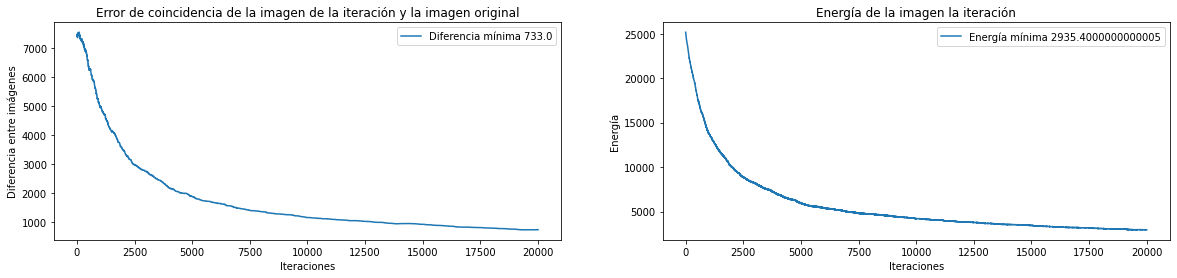

(-0.5, 149.5, 99.5, -0.5)

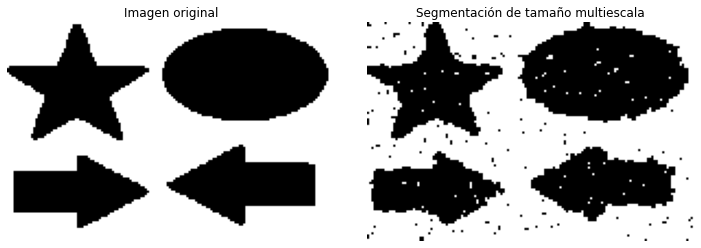

In [71]:
##Gráfica del error con respecto a la imagen original
fi,ax=plt.subplots(1,2)
fi.set_size_inches(20,4)

ax[0].plot(Er,label=f"Diferencia mínima {min(Er)}")
ax[0].set_xlabel("Iteraciones")
ax[0].set_ylabel("Diferencia entre imágenes")
ax[0].legend()
ax[0].set_title("Error de coincidencia de la imagen de la iteración y la imagen original")

##Gráfica de la energía en la iteración i-ésima

ax[1].plot(Ep,label=f"Energía mínima {min(Ep)}")
ax[1].legend()
ax[1].set_xlabel("Iteraciones")
ax[1].set_ylabel("Energía")
ax[1].set_title("Energía de la imagen la iteración")
plt.show()

##Resultados de la segmentación binaria

fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,10)
fig.tight_layout(pad=0.1)
axs[0].imshow(im0,cmap="gray")
axs[0].set_title("Imagen original")
axs[0].axis("off")
axs[1].imshow(x[i-1],cmap="gray")
axs[1].set_title("Segmentación de tamaño multiescala")
axs[1].axis("off")

##Animación

In [72]:
%%capture
fig,ax = plt.subplots();
def animate(i):
       ax.clear()
       ax.set_axis_off()
       ax.imshow(x[100*i],cmap="gray")
ani = animation.FuncAnimation(fig,animate,frames=200,interval=50,blit=False)
rc('animation', html='jshtml')

In [ ]:
Javascript('document.querySelector(".anim-state").state.value="once" ')
Javascript('document.querySelector(".anim-controls > button:nth-child(6)").click()')
ani

In [74]:
ani.save("escalado.mp4")